In [13]:
import warnings
warnings.filterwarnings('ignore')

# Notebook 1 for ISONE (winter) OSW Analysis
This notebook aims to replicate the work done by Susan Muller for the Union of Concerned Scientists, focusing on winter OSW analysis to determine the impact of an OSW fleet on ensuring grid reliability in winter months.

This notebook is designed to re-perform the analysis of winter months, to serve as a teaching tool for how to utilize python to navigate ISONE data. Further notebooks investigate the impact of OSW fleets during non-winter months, as well as the impact of solar on reliability during extreme weather events, namely the cold.

As-is, this notebook can be run to look at OSW and load for ISONE for any available year and month(s) combination.
**Parts 1-3** read in the data for ISONE OSW power potential and load.

The file paths in **parts 1 and 2** can be changed to look at another region.

**Part 4** can be edited to select specific years, and **part 5** can be edited to change the expected OSW fleet capacity.

**Part 6** focuses on plotting results.

**To run, press the play buttons for each grey cell in order!**

**Part 1:**
The first things users need to do is fetch the appropriate data from the ISONE website.

In [14]:
#Step 1: read in the wind file from the ISONE website
import zipfile
import io
import requests
from glob import glob
import pandas as pd

url = "https://www.iso-ne.com/static-assets/documents/2023/05/2023_isone_ver_dataset_2000_2022_rev0.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
folder = "2023_isone_ver_dataset_2000_2022_rev0"
z.extractall(path=f"/content/{folder}")
files = glob(folder + "/*/*.csv")
index = files.index('2023_isone_ver_dataset_2000_2022_rev0/wind/2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv')

#Step 2: Read the CSV file into a dataframe for management/cleaning.
"""
Pandas dataframes are kind of like excel spreadsheets in python. YOu can manipulate them by column
or row, sum, divide, subtract, multiply or anything else you can think of. You can visualize them
by using the print() function, or by using the .head() function (if you just want to see the beginning).

The following are some resources to learn more about pandas:
Pandas Documentation: https://pandas.pydata.org/docs/,
Pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf,
Pandas User Guide: https://pandas.pydata.org/docs/user_guide/index.html,
Pandas Introduction: https://www.geeksforgeeks.org/introduction-to-pandas-in-python/,
Pandas Tutorial: https://www.w3schools.com/python/pandas/default.asp,
"""
df = pd.read_csv(files[index])

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
df.head()

,LZ,Date,Year,Month,Day,yr_day,yr_wk,day_type,HE1,HE2,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
0,ISONE,01/01/2000,2000,1,1,1,0,WE,0.1182,0.1128,...,0.7474,0.8130,0.8483,0.8691,0.8735,0.8513,0.8644,0.8359,0.7853,0.7326
1,ISONE,01/02/2000,2000,1,2,2,1,WE,0.6034,0.4819,...,0.8502,0.8597,0.8855,0.9102,0.9183,0.9264,0.9357,0.9347,0.9372,0.9372
2,ISONE,01/03/2000,2000,1,3,3,1,WD,0.9358,0.9369,...,0.3960,0.3264,0.2228,0.1880,0.2142,0.2552,0.2616,0.3077,0.3615,0.4225
3,ISONE,01/04/2000,2000,1,4,4,1,WD,0.6101,0.7262,...,0.8515,0.7099,0.6723,0.6208,0.6287,0.5647,0.5804,0.7389,0.8130,0.9185
4,ISONE,01/05/2000,2000,1,5,5,1,WD,0.9231,0.9075,...,0.9225,0.9190,0.9028,0.8953,0.8761,0.8874,0.8830,0.8358,0.7761,0.7067


In [15]:
#Step 4: Create a new dataframe, "wind_data" with just the information we want.

#First, change the "Date" column in the original dataframe to "datetime" format.
#The datetime format allows us to manipulate the dates easily: https://docs.python.org/3/library/datetime.html
df['Date'] = pd.to_datetime(df['Date'])

#Next, create a new dataframe named "wind_data" to copy over just the columns we want.
wind_data = pd.DataFrame()

#Then, copy over the date column, which we have already put in datetime format!
wind_data['Date'] = df['Date'].copy()

#Finally, sum together the CP for every hour of the wind data, then add that as a column to our new dataframe as "Net CP for Fleet".
wind_data['Net CP for OSW Fleet'] = sum([df['HE1'], df['HE2'], df['HE3'], df['HE4'], df['HE5'],
                                        df['HE6'], df['HE7'], df['HE8'], df['HE9'], df['HE10'],
                                        df['HE11'], df['HE12'], df['HE13'], df['HE14'], df['HE15'],
                                        df['HE16'], df['HE17'], df['HE18'], df['HE19'], df['HE20'],
                                        df['HE21'], df['HE22'], df['HE23'], df['HE24']])

#We can print the new dataframe to make sure we have what we want!
print(wind_data)

           Date  Net CP for OSW Fleet
0    2000-01-01               11.9738
1    2000-01-02               16.2638
2    2000-01-03               15.3354
3    2000-01-04               19.2895
4    2000-01-05               21.4297
...         ...                   ...
8396 2022-12-27               10.5740
8397 2022-12-28                9.0555
8398 2022-12-29               14.4821
8399 2022-12-30               14.4530
8400 2022-12-31               13.8022

[8401 rows x 2 columns]


**Part 2:** Read in and clean/format the load data!

Now that the wind data is processed and in the format we want, we can work on the load data using a similar process!

In [16]:
#Step 1: read in the load file from the ISONE website
url = "https://www.iso-ne.com/static-assets/documents/2023/05/2023_isone_ver_dataset_2000_2022_rev0.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
folder = "2023_isone_ver_dataset_2000_2022_rev0"
z.extractall(path=f"/content/{folder}")
files = glob(folder + "/*/*.csv")
index = files.index('2023_isone_ver_dataset_2000_2022_rev0/load/ISONE_grossload_metdata_spliced_23yr_EPT.csv')

#Step 2: Read the CSV file into a dataframe for management/cleaning.
df = pd.read_csv(files[index])

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
df.head()

,Date,Hour_Ending,ISONE_grs_ld,ISONE_temp,ISONE_rh,ISONE_ghi,ISONE_10m_lz_wnd_spd,ISONE_onsw_wnd_spd,ISONE_ofsw_wnd_spd
0,1999-12-31,20,13973.870,1.000,63.544,0.0,1.528,7.405,4.824
1,1999-12-31,21,15327.421,-1.728,58.923,0.0,1.883,7.995,4.924
2,1999-12-31,22,15840.597,-2.555,66.559,0.0,2.344,7.448,5.243
3,1999-12-31,23,15095.283,-2.888,63.212,0.0,2.734,7.123,5.406
4,1999-12-31,24,13747.394,-3.503,62.954,0.0,2.997,6.831,5.574


In [17]:
#Step 4: Combine the grid load based on dates, sum the load for the same day!
#We will use the groupby() function, and group the rows by day, summing over load column.
#We will save this into a series, which will have the date as the index, and the load for each cummulative day as the value.
gl = df.groupby('Date')['ISONE_grs_ld'].sum()

#Now, create a new dataframe for the grid_load, similar to the wind_data from above.
grid_load = pd.DataFrame()

#Then, copy over the indexes (dates) and values (cummulative load) to the new data frame.
grid_load['Date'] = gl.index.copy()
grid_load['Load'] = gl.values.copy()

#Ensure the date is in datetime format!
grid_load['Date'] = pd.to_datetime(grid_load['Date'])

#Print to make sure you have the data in the correct format!
print(grid_load)

           Date        Load
0    1999-12-31   73984.565
1    2000-01-01  354832.061
2    2000-01-02  349242.490
3    2000-01-03  350583.444
4    2000-01-04  345941.275
...         ...         ...
8398 2022-12-28  350730.536
8399 2022-12-29  328251.077
8400 2022-12-30  304037.998
8401 2022-12-31  288181.831
8402 2023-01-01   11102.659

[8403 rows x 2 columns]


**Part 3:** Combine our 2 new dataframes so that they share a date column.

Having our data in a single dataframe is like combining it into a single excel sheet. The merge function below will merge the two dataframes based on rows that have the same value in the date column. Thus, we are matching the load and wind by day. And days that are missing will have NaN values assigned, meaning there is no data for that day.

In [18]:
#Step 1: Use the merge function, provided by Pandas, to combine the two dataframes.
wind_load_data = pd.merge(grid_load, wind_data, on = "Date", how = "left")

#Print to ensure we have gotten it right!
print(wind_load_data)

           Date        Load  Net CP for OSW Fleet
0    1999-12-31   73984.565                   NaN
1    2000-01-01  354832.061               11.9738
2    2000-01-02  349242.490               16.2638
3    2000-01-03  350583.444               15.3354
4    2000-01-04  345941.275               19.2895
...         ...         ...                   ...
8398 2022-12-28  350730.536                9.0555
8399 2022-12-29  328251.077               14.4821
8400 2022-12-30  304037.998               14.4530
8401 2022-12-31  288181.831               13.8022
8402 2023-01-01   11102.659                   NaN

[8403 rows x 3 columns]


**Part 4:** Select which year and months on which to perform analysis!

In [19]:
#Step 1: Choose the two winter years you want to focus on.
winter_year_one = 2021 #Dec year!
winter_year_two = 2022 #Jan + Feb year!

#Step 2: Select a year and 3 months that we want to look at for the analysis.
analysis_data = wind_load_data.loc[((wind_load_data['Date'].dt.year == winter_year_one) & (wind_load_data['Date'].dt.month == 12)) | ((wind_load_data['Date'].dt.year == winter_year_two) & ((wind_load_data['Date'].dt.month == 1) | (wind_load_data['Date'].dt.month == 2)))]

#By printing, we can see that it has only pulled out these rows!
print(analysis_data)

           Date        Load  Net CP for OSW Fleet
8006 2021-12-01  334517.947                9.9793
8007 2021-12-02  324667.943               17.2016
8008 2021-12-03  325541.509               20.9622
8009 2021-12-04  322883.937                6.8030
8010 2021-12-05  311559.593                5.4686
...         ...         ...                   ...
8091 2022-02-24  351233.043                8.5135
8092 2022-02-25  360815.442               15.7106
8093 2022-02-26  342560.739                7.9260
8094 2022-02-27  328842.694               18.3442
8095 2022-02-28  359428.934               15.2274

[90 rows x 3 columns]


**Part 5:** Add in different total OSW fleet capacities to determine the potential generation from various NE OSW projects. This analysis considers total fleet capacities of 1500 MW, 4000 MW and 8000 MW. We will add these into the dataframe as columns of the new load after we subtract the anticipated OSW generation. The anticipated fleet generation is determined by multiplying the installation fleet capacity with the cumulative daily capacity factors.

In [20]:
#Step 1: Add different fleet capacities.
analysis_data['Load - 1500MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 1500)
analysis_data['Load - 4000MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 4000)
analysis_data['Load - 8000MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 8000)

#Step 2: Remove the old net capacity column as we no longer need it.
analysis_data = analysis_data.drop(columns = ['Net CP for OSW Fleet'])

#Step 3: Print to make sure we have the right data!
print(analysis_data)

#You can safely ignore any warnings about "a value trying to be set on a copy of a slice".

           Date        Load  Load - 1500MW OSW Fleet  Load - 4000MW OSW Fleet  \
8006 2021-12-01  334517.947               319548.997               294600.747   
8007 2021-12-02  324667.943               298865.543               255861.543   
8008 2021-12-03  325541.509               294098.209               241692.709   
8009 2021-12-04  322883.937               312679.437               295671.937   
8010 2021-12-05  311559.593               303356.693               289685.193   
...         ...         ...                      ...                      ...   
8091 2022-02-24  351233.043               338462.793               317179.043   
8092 2022-02-25  360815.442               337249.542               297973.042   
8093 2022-02-26  342560.739               330671.739               310856.739   
8094 2022-02-27  328842.694               301326.394               255465.894   
8095 2022-02-28  359428.934               336587.834               298519.334   

      Load - 8000MW OSW Fle

**Part 6:** Plot the data!

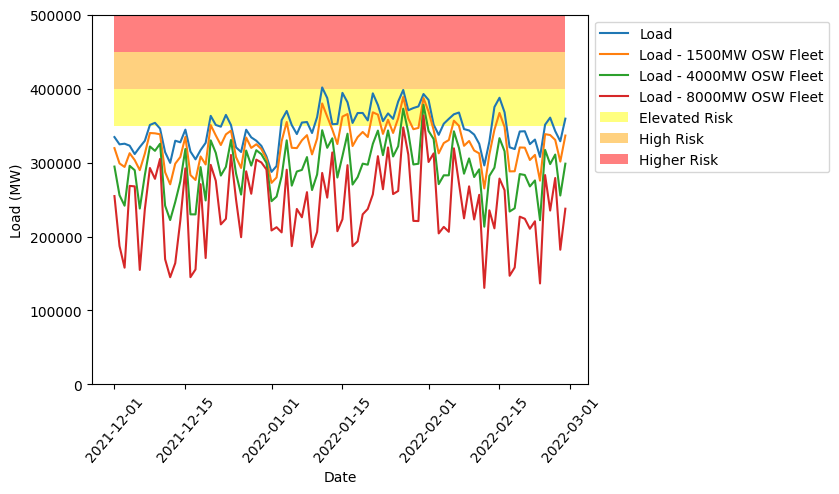

In [21]:
#Step 1: Import matplotlib as the plotting tool to use!
import matplotlib.pyplot as plt

#Step 2: Define a figure and axis.
fig, ax = plt.subplots()

#Step 3: Plot the data! Here we have the date on the x axis, with load on the y-axis.
ax.plot(analysis_data['Date'], analysis_data['Load'], label = 'Load')
ax.plot(analysis_data['Date'], analysis_data['Load - 1500MW OSW Fleet'], label = 'Load - 1500MW OSW Fleet')
ax.plot(analysis_data['Date'], analysis_data['Load - 4000MW OSW Fleet'], label = 'Load - 4000MW OSW Fleet')
ax.plot(analysis_data['Date'], analysis_data['Load - 8000MW OSW Fleet'], label = 'Load - 8000MW OSW Fleet')

#Step 4: Label the both the x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Load (MW)')

#Step 5: Set the x and y axis limits.
ax.set_ylim(ymin=0, ymax=500000)

#Step 6: Rotate the x axis time labels for better fit within the figure.
plt.xticks(rotation=50)

#Step 7: Define the risk regions.
plt.fill_between(analysis_data['Date'], 350000, 400000, color='yellow', alpha=0.5, linewidth = 0.0, label='Elevated Risk')
plt.fill_between(analysis_data['Date'], 400000, 450000, color='orange', alpha=0.5, linewidth = 0.0, label='High Risk')
plt.fill_between(analysis_data['Date'], 450000, 500000, color='red', alpha=0.5, linewidth = 0.0, label='Higher Risk')

#Step 8: Create the legend and show the plot!
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [22]:
#Step 9.1: Print the number of days with elevated risk
print("Days of Elevated Risk or greater with no OSW Fleet: ", analysis_data[(analysis_data["Load"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 1500 MW OSW Fleet: ", analysis_data[(analysis_data["Load - 1500MW OSW Fleet"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 4000 MW OSW Fleet: ", analysis_data[(analysis_data["Load - 4000MW OSW Fleet"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 8000 MW OSW Fleet: ", analysis_data[(analysis_data["Load - 8000MW OSW Fleet"] > 350000)].shape[0])

Days of Elevated Risk or greater with no OSW Fleet:  45
Days of Elevated Risk or greater with 1500 MW OSW Fleet:  16
Days of Elevated Risk or greater with 4000 MW OSW Fleet:  2
Days of Elevated Risk or greater with 8000 MW OSW Fleet:  1


In [23]:
#Step 9.2: Print the number of days with high risk
print("Days of High Risk or greater with no OSW Fleet: ", analysis_data[(analysis_data["Load"] > 400000)].shape[0])
print("Days of High Risk or greater with 1500 MW OSW Fleet: ", analysis_data[(analysis_data["Load - 1500MW OSW Fleet"] > 400000)].shape[0])
print("Days of High Risk or greater with 4000 MW OSW Fleet: ", analysis_data[(analysis_data["Load - 4000MW OSW Fleet"] > 400000)].shape[0])
print("Days of High Risk or greater with 8000 MW OSW Fleet: ", analysis_data[(analysis_data["Load - 8000MW OSW Fleet"] > 400000)].shape[0])

Days of High Risk or greater with no OSW Fleet:  1
Days of High Risk or greater with 1500 MW OSW Fleet:  0
Days of High Risk or greater with 4000 MW OSW Fleet:  0
Days of High Risk or greater with 8000 MW OSW Fleet:  0


In [24]:
#Step 9.3: Print the number of days with higher risk
print("Days of Higher Risk with no OSW Fleet: ", analysis_data[analysis_data["Load"] > 450000].shape[0])
print("Days of Higher Risk with 1500 MW OSW Fleet: ", analysis_data[analysis_data["Load - 1500MW OSW Fleet"] > 450000].shape[0])
print("Days of Higher Risk with 4000 MW OSW Fleet: ", analysis_data[analysis_data["Load - 4000MW OSW Fleet"] > 450000].shape[0])
print("Days of Higher Risk with 8000 MW OSW Fleet: ", analysis_data[analysis_data["Load - 8000MW OSW Fleet"] > 450000].shape[0])

Days of Higher Risk with no OSW Fleet:  0
Days of Higher Risk with 1500 MW OSW Fleet:  0
Days of Higher Risk with 4000 MW OSW Fleet:  0
Days of Higher Risk with 8000 MW OSW Fleet:  0


**Part 7:** Loop over all potential years to determine average number of days with elevated risk and plot this data!

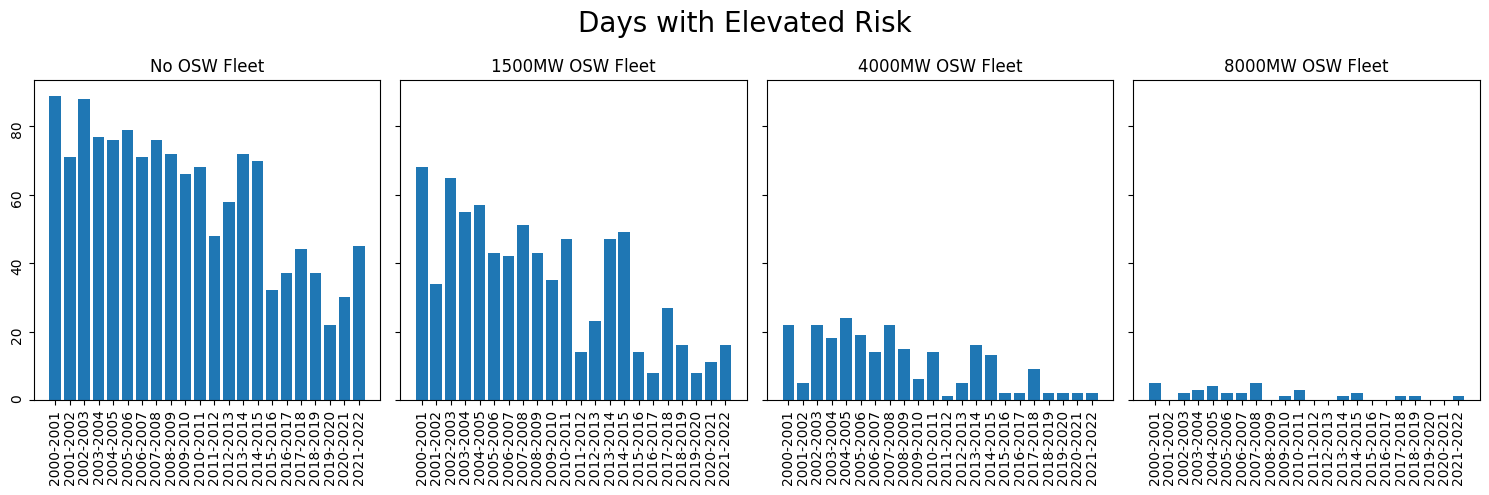

In [25]:
import warnings
warnings.filterwarnings("ignore")

#Step 1: Create a dataframe for the elevated risk data.
elevated_risk = pd.DataFrame(columns=['Year Range', 'No OSW Fleet', '1500MW OSW Fleet', '4000 MW OSW Fleet', '8000 MW OSW Fleet'])

years_min=2000
years_max = 2022

i = years_min
while i < years_max:
  winter_year_one = i
  winter_year_two = i+1
  analysis_data = wind_load_data.loc[((wind_load_data['Date'].dt.year == winter_year_one) & (wind_load_data['Date'].dt.month == 12)) | ((wind_load_data['Date'].dt.year == winter_year_two) & ((wind_load_data['Date'].dt.month == 1) | (wind_load_data['Date'].dt.month == 2)))]
  analysis_data['Load - 1500MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 1500)
  analysis_data['Load - 4000MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 4000)
  analysis_data['Load - 8000MW OSW Fleet'] = analysis_data['Load'] - (analysis_data['Net CP for OSW Fleet'] * 8000)
  analysis_data = analysis_data.drop(columns = ['Net CP for OSW Fleet'])
  elevated_risk.loc[i - years_min] = [str(winter_year_one)+"-"+str(winter_year_two), analysis_data[analysis_data["Load"] > 350000].shape[0], analysis_data[(analysis_data["Load - 1500MW OSW Fleet"] > 350000)].shape[0], analysis_data[(analysis_data["Load - 4000MW OSW Fleet"] > 350000)].shape[0], analysis_data[analysis_data["Load - 8000MW OSW Fleet"] > 350000].shape[0]]
  i+=1


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), sharey=True)
axes[0].bar(elevated_risk['Year Range'], elevated_risk['No OSW Fleet'], label='Days of Elevated Risk without OSW Fleet')
axes[1].bar(elevated_risk['Year Range'], elevated_risk['1500MW OSW Fleet'], label='Days of Elevated Risk with 1500MW OSW Fleet')
axes[2].bar(elevated_risk['Year Range'], elevated_risk['4000 MW OSW Fleet'], label='Days of Elevated Risk with 4000MW OSW Fleet')
axes[3].bar(elevated_risk['Year Range'], elevated_risk['8000 MW OSW Fleet'], label='Days of Elevated Risk with 8000MW OSW Fleet')

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)
axes[3].tick_params(labelrotation=90)

plt.suptitle("Days with Elevated Risk", fontsize=20)
axes[0].set_title('No OSW Fleet')
axes[1].set_title('1500MW OSW Fleet')
axes[2].set_title('4000MW OSW Fleet')
axes[3].set_title('8000MW OSW Fleet')

plt.tight_layout()
plt.show()